<a href="https://colab.research.google.com/github/Ankith-1501/E-commerce-Customer-Analysis/blob/main/E_commerce_Customer_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Install kaggle
!pip install -q kaggle

# Upload your kaggle.json file (you'll need to create this from your Kaggle account)
from google.colab import files
files.upload()  # Upload your kaggle.json here

# Move kaggle.json to proper location
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download the dataset
!kaggle datasets download -d olistbr/brazilian-ecommerce
!unzip brazilian-ecommerce.zip

Saving 1729820115_IMG_20241025_070446644_HDR_AE.jpg to 1729820115_IMG_20241025_070446644_HDR_AE.jpg
Saving 1729820078_IMG_20241025_070417780_HDR_AE.jpg to 1729820078_IMG_20241025_070417780_HDR_AE.jpg
Saving 1729820048_IMG_20241025_070345195_HDR_AE.jpg to 1729820048_IMG_20241025_070345195_HDR_AE.jpg
cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce
License(s): CC-BY-NC-SA-4.0
100% 42.6M/42.6M [00:00<00:00, 136MB/s]
100% 42.6M/42.6M [00:00<00:00, 122MB/s]
Archive:  brazilian-ecommerce.zip
  inflating: olist_customers_dataset.csv  
  inflating: olist_geolocation_dataset.csv  
  inflating: olist_order_items_dataset.csv  
  inflating: olist_order_payments_dataset.csv  
  inflating: olist_order_reviews_dataset.csv  
  inflating: olist_orders_dataset.csv  
  inflating: olist_products_dataset.csv  
  inflating: olist_sellers_dataset.csv  
 

In [9]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
plt.style.use('seaborn')  # For better looking plots

# Load all datasets
print("Loading datasets...")

# Main datasets
orders_df = pd.read_csv('olist_orders_dataset.csv')
customers_df = pd.read_csv('olist_customers_dataset.csv')
order_items_df = pd.read_csv('olist_order_items_dataset.csv')
products_df = pd.read_csv('olist_products_dataset.csv')
payments_df = pd.read_csv('olist_order_payments_dataset.csv')

print("\nDatasets loaded successfully!")

# Let's check basic information about each dataset
def check_dataset(df, name):
    print(f"\n{'='*50}")
    print(f"{name} Dataset Overview:")
    print(f"{'='*50}")
    print(f"Shape: {df.shape}")
    print("\nFirst few rows:")
    display(df.head(3))
    print("\nMissing values:")
    display(df.isnull().sum()[df.isnull().sum() > 0])

# Check each dataset
check_dataset(orders_df, 'Orders')
check_dataset(customers_df, 'Customers')
check_dataset(order_items_df, 'Order Items')
check_dataset(products_df, 'Products')
check_dataset(payments_df, 'Payments')



<ipython-input-9-020200585a12>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')  # For better looking plots


Loading datasets...

Datasets loaded successfully!

Orders Dataset Overview:
Shape: (99441, 8)

First few rows:


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00



Missing values:


,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965



Customers Dataset Overview:
Shape: (99441, 5)

First few rows:


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP



Missing values:


,0



Order Items Dataset Overview:
Shape: (112650, 7)

First few rows:


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87



Missing values:


,0



Products Dataset Overview:
Shape: (32951, 9)

First few rows:


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0



Missing values:


,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2



Payments Dataset Overview:
Shape: (103886, 5)

First few rows:


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71



Missing values:


,0


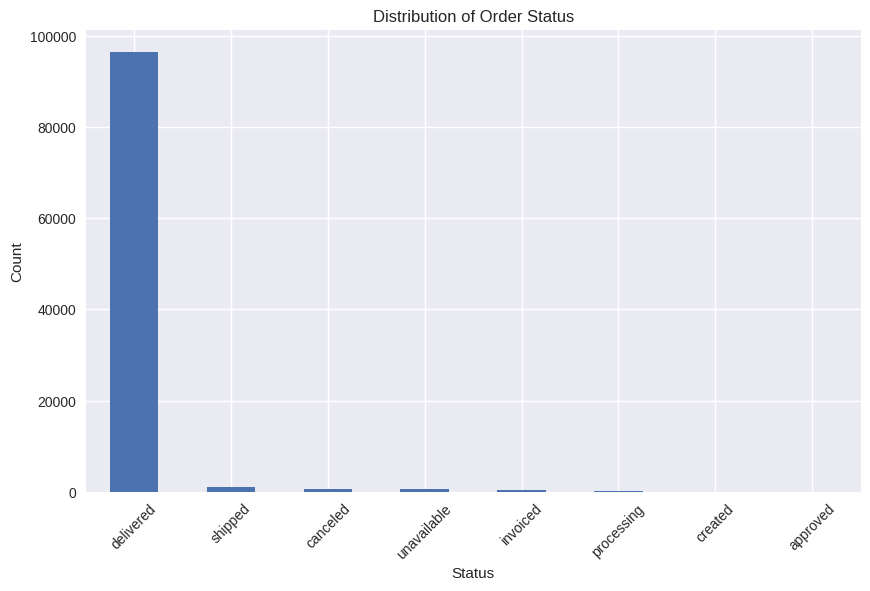

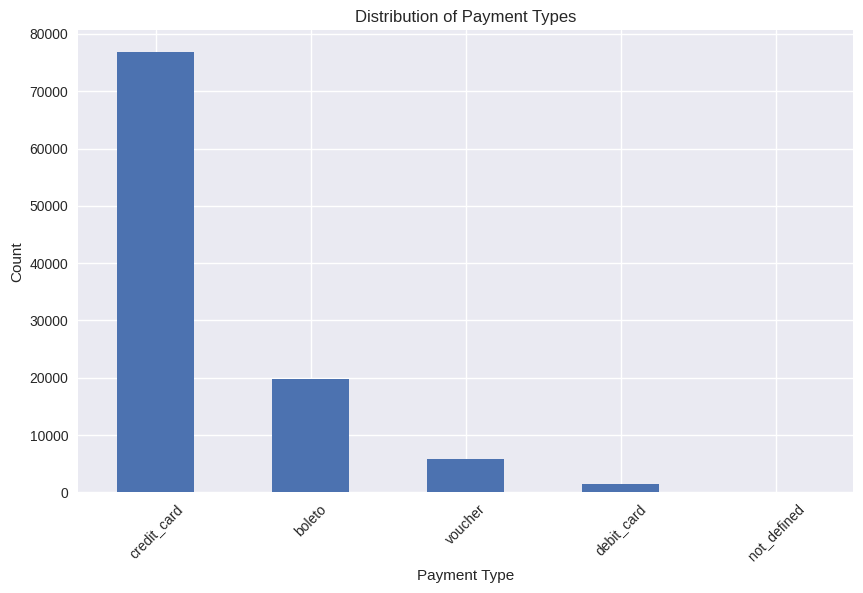


Average Order Value: $160.99


In [10]:
# Basic analysis of orders and payments
def basic_analysis():
    # 1. Order Status Distribution
    plt.figure(figsize=(10, 6))
    orders_df['order_status'].value_counts().plot(kind='bar')
    plt.title('Distribution of Order Status')
    plt.xlabel('Status')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

    # 2. Payment Types Distribution
    plt.figure(figsize=(10, 6))
    payments_df['payment_type'].value_counts().plot(kind='bar')
    plt.title('Distribution of Payment Types')
    plt.xlabel('Payment Type')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

    # 3. Average Order Value
    avg_order_value = payments_df.groupby('order_id')['payment_value'].sum().mean()
    print(f"\nAverage Order Value: ${avg_order_value:.2f}")

basic_analysis()



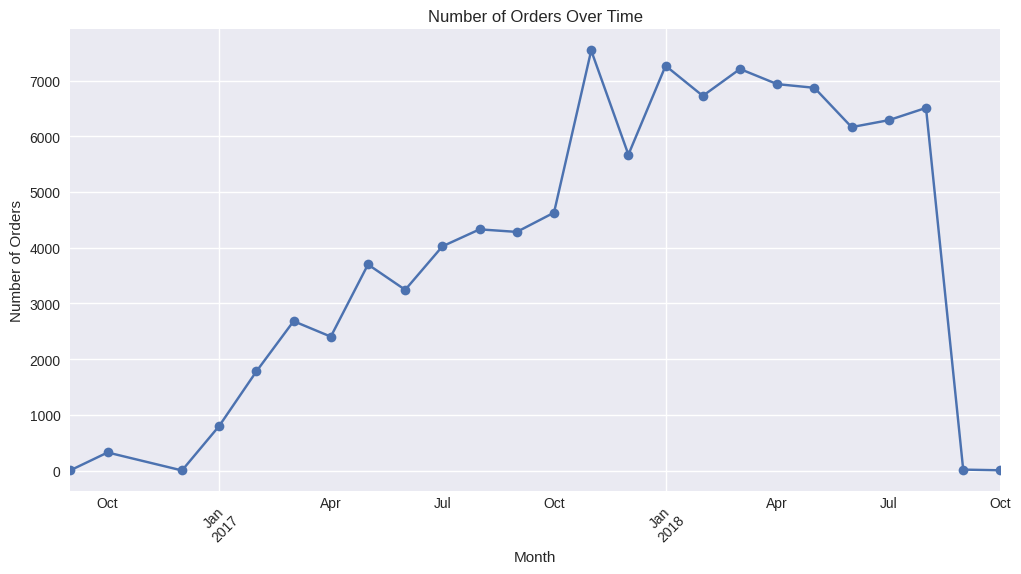


What would you like to analyze next?
1. Customer segmentation
2. Product category analysis
3. Geographical analysis
4. Delivery performance analysis


In [11]:
# Time-based analysis
def time_analysis():
    # Convert to datetime
    orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])

    # Orders over time (monthly)
    orders_df['month_year'] = orders_df['order_purchase_timestamp'].dt.to_period('M')
    monthly_orders = orders_df.groupby('month_year').size()

    plt.figure(figsize=(12, 6))
    monthly_orders.plot(kind='line', marker='o')
    plt.title('Number of Orders Over Time')
    plt.xlabel('Month')
    plt.ylabel('Number of Orders')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

time_analysis()

print("\nWhat would you like to analyze next?")
print("1. Customer segmentation")
print("2. Product category analysis")
print("3. Geographical analysis")
print("4. Delivery performance analysis")